In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [32]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

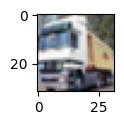

In [8]:
plot_sample(1)

In [9]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [10]:
y_train = y_train.reshape((y_train.shape[0],))
y_test = y_test.reshape((y_test.shape[0],))
y_val = y_val.reshape((y_test.shape[0],))

In [11]:
from keras.layers import Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, Dense
model = keras.Sequential([
        #cnn
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        #dense
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
348/782 [============>.................] - ETA: 4s - loss: 2.4528 - accuracy: 0.2532

KeyboardInterrupt: 

In [15]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 1s 10ms/step - loss: 0.4971 - accuracy: 0.8328


[0.49710509181022644, 0.8327999711036682]

In [29]:
model_prediction = model.predict(X_test[0].reshape((1,)+ X_test[0].shape))

1/1 [==============================] - 0s 18ms/step


Text(0.5, 1.0, 'ship')

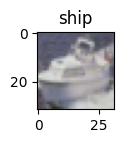

In [33]:
plt.figure(figsize = (10,1))
plt.imshow(X_test[0])
plt.title(classes[y_test[0]])

In [30]:
classes[np.argmax(model_prediction[0])]

'ship'

In [25]:
(1,) + X_test[0].shape

(1, 32, 32, 3)

In [35]:
model_prediction_total = model.predict(X_test)

79/79 [==============================] - 0s 3ms/step


In [37]:
y_pred = np.array([np.argmax(pred) for pred in model_prediction_total])
y_pred.T

array([8, 5, 1, ..., 6, 3, 8])

# Saving the Model

In [16]:
import joblib
joblib.dump(model,'cifar10.pkl')

['cifar10.pkl']

In [49]:
model.save('cifar10.h5')

# Saving the classes

In [38]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
import json
classesJson = {
    i:classes[i] for i in range(len(classes))
}
with open("classes.json","w") as f:
    f.write(json.dumps(classesJson))

In [47]:
tf.__version__

'2.15.0'

In [15]:
model2 = keras.models.load_model("./cifar10.h5")

In [31]:
from sklearn.metrics import classification_report

In [36]:
y_pred = np.array([np.argmax(pred) for pred in model2.predict(X_test)])
print(classification_report(y_test,y_pred.T))

79/79 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       271
           1       0.93      0.89      0.91       246
           2       0.83      0.76      0.79       237
           3       0.63      0.73      0.68       241
           4       0.76      0.87      0.81       245
           5       0.86      0.77      0.81       281
           6       0.90      0.89      0.90       263
           7       0.85      0.88      0.86       226
           8       0.88      0.94      0.91       241
           9       0.90      0.91      0.91       249

    accuracy                           0.84      2500
   macro avg       0.85      0.84      0.84      2500
weighted avg       0.85      0.84      0.84      2500

